In [1]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/tayutaedomo/project/machine-learning/udemy-tensorflow-gan/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tayutaedomo/project/machine-learning/udemy-tensorflow-gan/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tayutaedomo/project/machine-learning/udemy-tensorflow-gan/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')

    return inputs_real, inputs_z

In [4]:
def generator(z, out_dim, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        h1 = tf.layers.dense(z, n_units, activation=None)
        h1 = tf.maximum(alpha * h1, h1)

        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.tanh(logits)

        return out

In [5]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        h1 = tf.layers.dense(x, n_units, activation=None)
        h1 = tf.maximum(alpha * h1, h1)

        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits)

        return out, logits

In [6]:
input_size = 784
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01
smooth = 0.1

In [7]:
tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)

g_model = generator(input_z, input_size, n_units=g_hidden_size, alpha=alpha)

d_model_real, d_logits_real = discriminator(input_real, n_units=d_hidden_size, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, n_units=d_hidden_size, alpha=alpha)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                     labels=tf.ones_like(d_logits_real) * (1 - smooth)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                     labels=tf.zeros_like(d_logits_real)))
d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                labels=tf.ones_like(d_logits_fake)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
learning_rate = 0.002

t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

In [10]:
batch_size = 100
batch = mnist.train.next_batch(batch_size)

In [11]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 8, 5, 7, 4, 4, 1, 6, 0, 0, 0, 8, 6, 8, 5, 1, 6, 9, 1, 7, 4, 3,
        7, 2, 0, 1, 0, 9, 5, 3, 7, 5, 3, 4, 6, 8, 1, 3, 2, 9, 4, 7, 6, 4,
        7, 8, 6, 7, 4, 5, 9, 4, 3, 0, 3, 1, 1, 3, 1, 6, 4, 4, 5, 0, 6, 8,
        0, 6, 7, 3, 1, 0, 8, 1, 5, 7, 0, 4, 8, 6, 6, 4, 2, 5, 3, 4, 4, 6,
        0, 5, 7, 1, 9, 5, 6, 4, 2, 5, 5, 3], dtype=uint8))

In [12]:
batch[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
len(batch[0])

100

In [14]:
batch[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
batch[1][0]

3

In [18]:
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)

            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1

            batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))

            _ = sess.run(d_train_optimize, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_optimize, feed_dict={input_z: batch_z})

        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_logg_g = g_loss.eval({input_z: batch_z})

        print("EPOCH {}/{}".format(e+1, epochs),
            "D LOSS: {:.4f} ".format(train_loss_d),
            "G LOSS: {:.4f} ".format(train_logg_g))

        losses.append((train_loss_d, train_logg_g))

        sample_z = np.random.uniform(-1, 1, size=(16, z_size))
        gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                              feed_dict={input_z: sample_z})
        samples.append(gen_samples)
        saver.save(sess, './checkpoints/generator.ckpt')
    
with open('training_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)


EPOCH 1/100 D LOSS: 0.3540  G LOSS: 4.1733 
EPOCH 2/100 D LOSS: 0.4884  G LOSS: 2.4384 
EPOCH 3/100 D LOSS: 0.4809  G LOSS: 5.4235 
EPOCH 4/100 D LOSS: 1.9037  G LOSS: 3.4708 
EPOCH 5/100 D LOSS: 0.7877  G LOSS: 2.6776 


EPOCH 6/100 D LOSS: 1.2882  G LOSS: 1.9393 
EPOCH 7/100 D LOSS: 1.2017  G LOSS: 2.4462 
EPOCH 8/100 D LOSS: 0.8670  G LOSS: 1.9505 
EPOCH 9/100 D LOSS: 1.3444  G LOSS: 1.7154 


EPOCH 10/100 D LOSS: 4.7459  G LOSS: 1.2765 
EPOCH 11/100 D LOSS: 0.7070  G LOSS: 2.5001 
EPOCH 12/100 D LOSS: 1.6508  G LOSS: 1.4905 
EPOCH 13/100 D LOSS: 1.2727  G LOSS: 1.5427 


EPOCH 14/100 D LOSS: 0.6934  G LOSS: 2.9857 
EPOCH 15/100 D LOSS: 1.0290  G LOSS: 1.4575 
EPOCH 16/100 D LOSS: 0.8893  G LOSS: 1.7621 
EPOCH 17/100 D LOSS: 1.1792  G LOSS: 3.1941 
EPOCH 18/100 D LOSS: 1.9971  G LOSS: 1.4506 


EPOCH 19/100 D LOSS: 1.1751  G LOSS: 1.8305 
EPOCH 20/100 D LOSS: 1.2131  G LOSS: 2.0759 
EPOCH 21/100 D LOSS: 1.3516  G LOSS: 2.3120 
EPOCH 22/100 D LOSS: 1.0909  G LOSS: 1.8311 


EPOCH 23/100 D LOSS: 0.8871  G LOSS: 2.0322 
EPOCH 24/100 D LOSS: 0.9728  G LOSS: 2.1109 
EPOCH 25/100 D LOSS: 0.8617  G LOSS: 3.3759 
EPOCH 26/100 D LOSS: 1.4321  G LOSS: 1.5389 


EPOCH 27/100 D LOSS: 1.3449  G LOSS: 2.1704 
EPOCH 28/100 D LOSS: 1.0236  G LOSS: 2.4069 
EPOCH 29/100 D LOSS: 0.8967  G LOSS: 2.9623 
EPOCH 30/100 D LOSS: 0.9262  G LOSS: 2.2799 


EPOCH 31/100 D LOSS: 1.2885  G LOSS: 1.7917 
EPOCH 32/100 D LOSS: 1.0024  G LOSS: 2.6123 
EPOCH 33/100 D LOSS: 0.7942  G LOSS: 2.4119 
EPOCH 34/100 D LOSS: 0.8202  G LOSS: 2.0817 
EPOCH 35/100 D LOSS: 0.8021  G LOSS: 2.5953 


EPOCH 36/100 D LOSS: 0.7253  G LOSS: 3.0024 
EPOCH 37/100 D LOSS: 0.8966  G LOSS: 1.8829 
EPOCH 38/100 D LOSS: 0.8150  G LOSS: 2.2164 
EPOCH 39/100 D LOSS: 1.0469  G LOSS: 1.6755 


EPOCH 40/100 D LOSS: 0.7236  G LOSS: 2.5274 
EPOCH 41/100 D LOSS: 0.9598  G LOSS: 1.8373 
EPOCH 42/100 D LOSS: 1.0813  G LOSS: 2.3792 
EPOCH 43/100 D LOSS: 0.9382  G LOSS: 2.2530 


EPOCH 44/100 D LOSS: 0.8200  G LOSS: 2.3232 
EPOCH 45/100 D LOSS: 0.8462  G LOSS: 2.4151 
EPOCH 46/100 D LOSS: 1.1172  G LOSS: 2.7416 
EPOCH 47/100 D LOSS: 0.8172  G LOSS: 1.8476 
EPOCH 48/100 D LOSS: 0.9389  G LOSS: 2.0524 


EPOCH 49/100 D LOSS: 1.0130  G LOSS: 1.8419 
EPOCH 50/100 D LOSS: 0.9282  G LOSS: 2.2695 
EPOCH 51/100 D LOSS: 0.8352  G LOSS: 2.1313 
EPOCH 52/100 D LOSS: 0.9751  G LOSS: 2.2224 


EPOCH 53/100 D LOSS: 1.0036  G LOSS: 1.8893 
EPOCH 54/100 D LOSS: 0.8883  G LOSS: 2.0161 
EPOCH 55/100 D LOSS: 1.0151  G LOSS: 1.7173 
EPOCH 56/100 D LOSS: 1.0066  G LOSS: 1.8398 


EPOCH 57/100 D LOSS: 0.8742  G LOSS: 2.2192 
EPOCH 58/100 D LOSS: 1.1319  G LOSS: 1.4880 
EPOCH 59/100 D LOSS: 1.0563  G LOSS: 1.9950 
EPOCH 60/100 D LOSS: 1.0311  G LOSS: 1.6085 
EPOCH 61/100 D LOSS: 0.9125  G LOSS: 2.0592 


EPOCH 62/100 D LOSS: 1.1364  G LOSS: 1.5964 
EPOCH 63/100 D LOSS: 1.0566  G LOSS: 2.0098 
EPOCH 64/100 D LOSS: 0.9709  G LOSS: 1.8908 
EPOCH 65/100 D LOSS: 0.9959  G LOSS: 1.7739 


EPOCH 66/100 D LOSS: 0.9470  G LOSS: 1.9107 
EPOCH 67/100 D LOSS: 1.0801  G LOSS: 1.6762 
EPOCH 68/100 D LOSS: 1.0677  G LOSS: 2.0066 
EPOCH 69/100 D LOSS: 0.9531  G LOSS: 1.8606 


EPOCH 70/100 D LOSS: 0.9235  G LOSS: 2.3207 
EPOCH 71/100 D LOSS: 0.9782  G LOSS: 2.2549 
EPOCH 72/100 D LOSS: 0.9399  G LOSS: 1.8490 
EPOCH 73/100 D LOSS: 1.0745  G LOSS: 1.7623 
EPOCH 74/100 D LOSS: 1.0584  G LOSS: 1.7123 


EPOCH 75/100 D LOSS: 1.0083  G LOSS: 1.8350 
EPOCH 76/100 D LOSS: 0.9333  G LOSS: 2.0381 
EPOCH 77/100 D LOSS: 1.0531  G LOSS: 1.4428 
EPOCH 78/100 D LOSS: 0.9837  G LOSS: 1.7997 


EPOCH 79/100 D LOSS: 0.9735  G LOSS: 1.8058 
EPOCH 80/100 D LOSS: 1.1342  G LOSS: 1.7552 
EPOCH 81/100 D LOSS: 1.2073  G LOSS: 1.4139 
EPOCH 82/100 D LOSS: 1.0084  G LOSS: 1.5463 


EPOCH 83/100 D LOSS: 0.9132  G LOSS: 1.6988 
EPOCH 84/100 D LOSS: 1.0833  G LOSS: 1.5257 
EPOCH 85/100 D LOSS: 1.1151  G LOSS: 1.5506 
EPOCH 86/100 D LOSS: 0.9121  G LOSS: 1.7216 
EPOCH 87/100 D LOSS: 1.0883  G LOSS: 1.5559 


EPOCH 88/100 D LOSS: 0.8668  G LOSS: 1.9387 
EPOCH 89/100 D LOSS: 1.2083  G LOSS: 1.7061 
EPOCH 90/100 D LOSS: 1.1586  G LOSS: 1.7907 
EPOCH 91/100 D LOSS: 1.1672  G LOSS: 1.1646 


EPOCH 92/100 D LOSS: 1.0718  G LOSS: 1.5682 
EPOCH 93/100 D LOSS: 0.9610  G LOSS: 1.8556 
EPOCH 94/100 D LOSS: 1.0447  G LOSS: 1.5417 
EPOCH 95/100 D LOSS: 1.0073  G LOSS: 1.6618 


EPOCH 96/100 D LOSS: 0.9030  G LOSS: 1.7913 
EPOCH 97/100 D LOSS: 0.8800  G LOSS: 1.7268 
EPOCH 98/100 D LOSS: 0.9816  G LOSS: 1.5292 
EPOCH 99/100 D LOSS: 1.0868  G LOSS: 1.5262 
EPOCH 100/100 D LOSS: 1.1218  G LOSS: 1.5959 


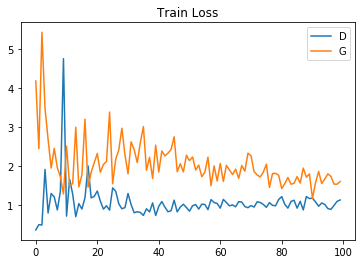

In [20]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='D')
plt.plot(losses.T[1], label='G')
plt.title('Train Loss')
plt.legend()

In [24]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7, 7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape(28, 28), cmap='Greys_r')

    return fig, axes


In [25]:
with open('training_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

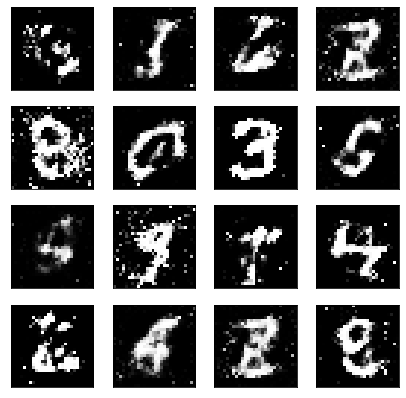

In [26]:
_ = view_samples(-1, samples)

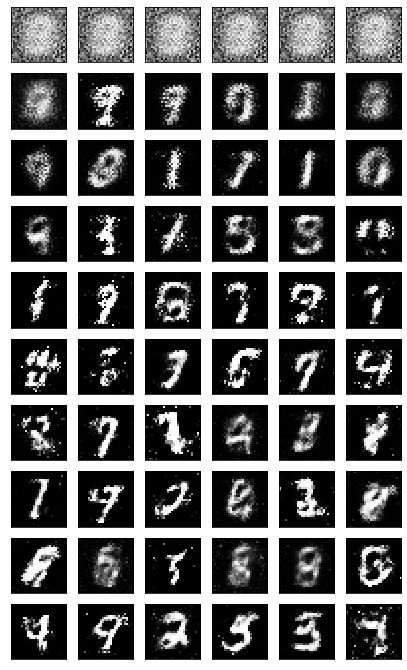

In [36]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7, 12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from checkpoints/generator.ckpt


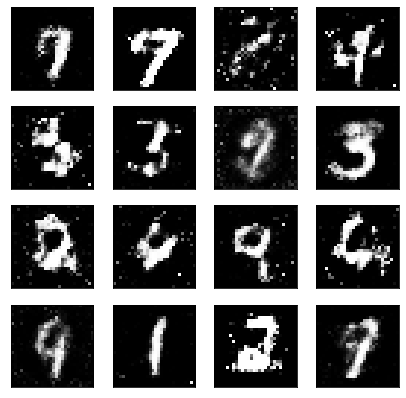

In [38]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1, 1, size=(16, z_size))
    gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                                    feed_dict={input_z: sample_z})

_ = view_samples(0, [gen_samples])